In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
ds = pd.read_csv('C:\Third_Year\EDI 6\EDI\datasets\project.csv', encoding='latin1')
ds.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
print(ds[' Label'].unique())

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack ï¿½ Brute Force' 'Web Attack ï¿½ XSS'
 'Web Attack ï¿½ Sql Injection' 'FTP-Patator' 'SSH-Patator'
 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed']


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ds[' Label'] = label_encoder.fit_transform(ds[' Label'])

# BENIGN: 0  
# Bot: 1  
# DDoS: 2  
# DoS GoldenEye: 3  
# DoS Hulk: 4  
# DoS Slowhttptest: 5  
# DoS slowloris: 6  
# FTP-Patator: 7  
# Heartbleed: 8  
# Infiltration: 9  
# PortScan: 10  
# SSH-Patator: 11  
# Web Attack – Brute Force: 12  
# Web Attack – Sql Injection: 13  
# Web Attack – XSS: 14

ds.shape

(2830743, 79)

In [5]:
inf_count = np.isinf(ds).sum().sum()
nan_count = ds.isna().sum().sum()

print(f"Total 'inf' values in dataset: {inf_count}")
print(f"Total 'NaN' values in dataset: {nan_count}")


Total 'inf' values in dataset: 4376
Total 'NaN' values in dataset: 1358


In [6]:
x = ds.iloc[:, :-1]
y = ds.iloc[:, -1] 

x.replace([np.inf, -np.inf], np.nan, inplace=True)
x.dropna(inplace=True)
y = y.loc[x.index]

x.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(x)

x_df = pd.DataFrame(features_scaled, columns=x.columns, index=x.index)
ds = pd.concat([x_df, y], axis=1)
ds.reset_index(drop=True, inplace=True)

print(ds.shape)


(2827876, 79)


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
# Step 2: Split temp into validation/dev (50%) and test (50%) => 10% each
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
rf_model = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)
rf_model.fit(x_train, y_train)
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': rf_model.feature_importances_})

least_important = feature_importance.sort_values(by='Importance', ascending=True)

print("Most Important Features:\n")
print(least_important.head(50))


Most Important Features:

                    Feature  Importance
50           ECE Flag Count    0.000000
31            Bwd PSH Flags    0.000000
33            Bwd URG Flags    0.000000
60     Bwd Avg Packets/Bulk    0.000000
59       Bwd Avg Bytes/Bulk    0.000000
61        Bwd Avg Bulk Rate    0.000000
58        Fwd Avg Bulk Rate    0.000000
57     Fwd Avg Packets/Bulk    0.000000
56       Fwd Avg Bytes/Bulk    0.000000
45           RST Flag Count    0.000000
49           CWE Flag Count    0.000005
32            Fwd URG Flags    0.000015
75                 Idle Std    0.000107
73               Active Min    0.000120
11    Bwd Packet Length Min    0.000168
71               Active Std    0.000184
46           PSH Flag Count    0.000266
30            Fwd PSH Flags    0.000485
44           SYN Flag Count    0.000490
43           FIN Flag Count    0.000491
28              Bwd IAT Max    0.000730
27              Bwd IAT Std    0.000851
68         act_data_pkt_fwd    0.000938
51            

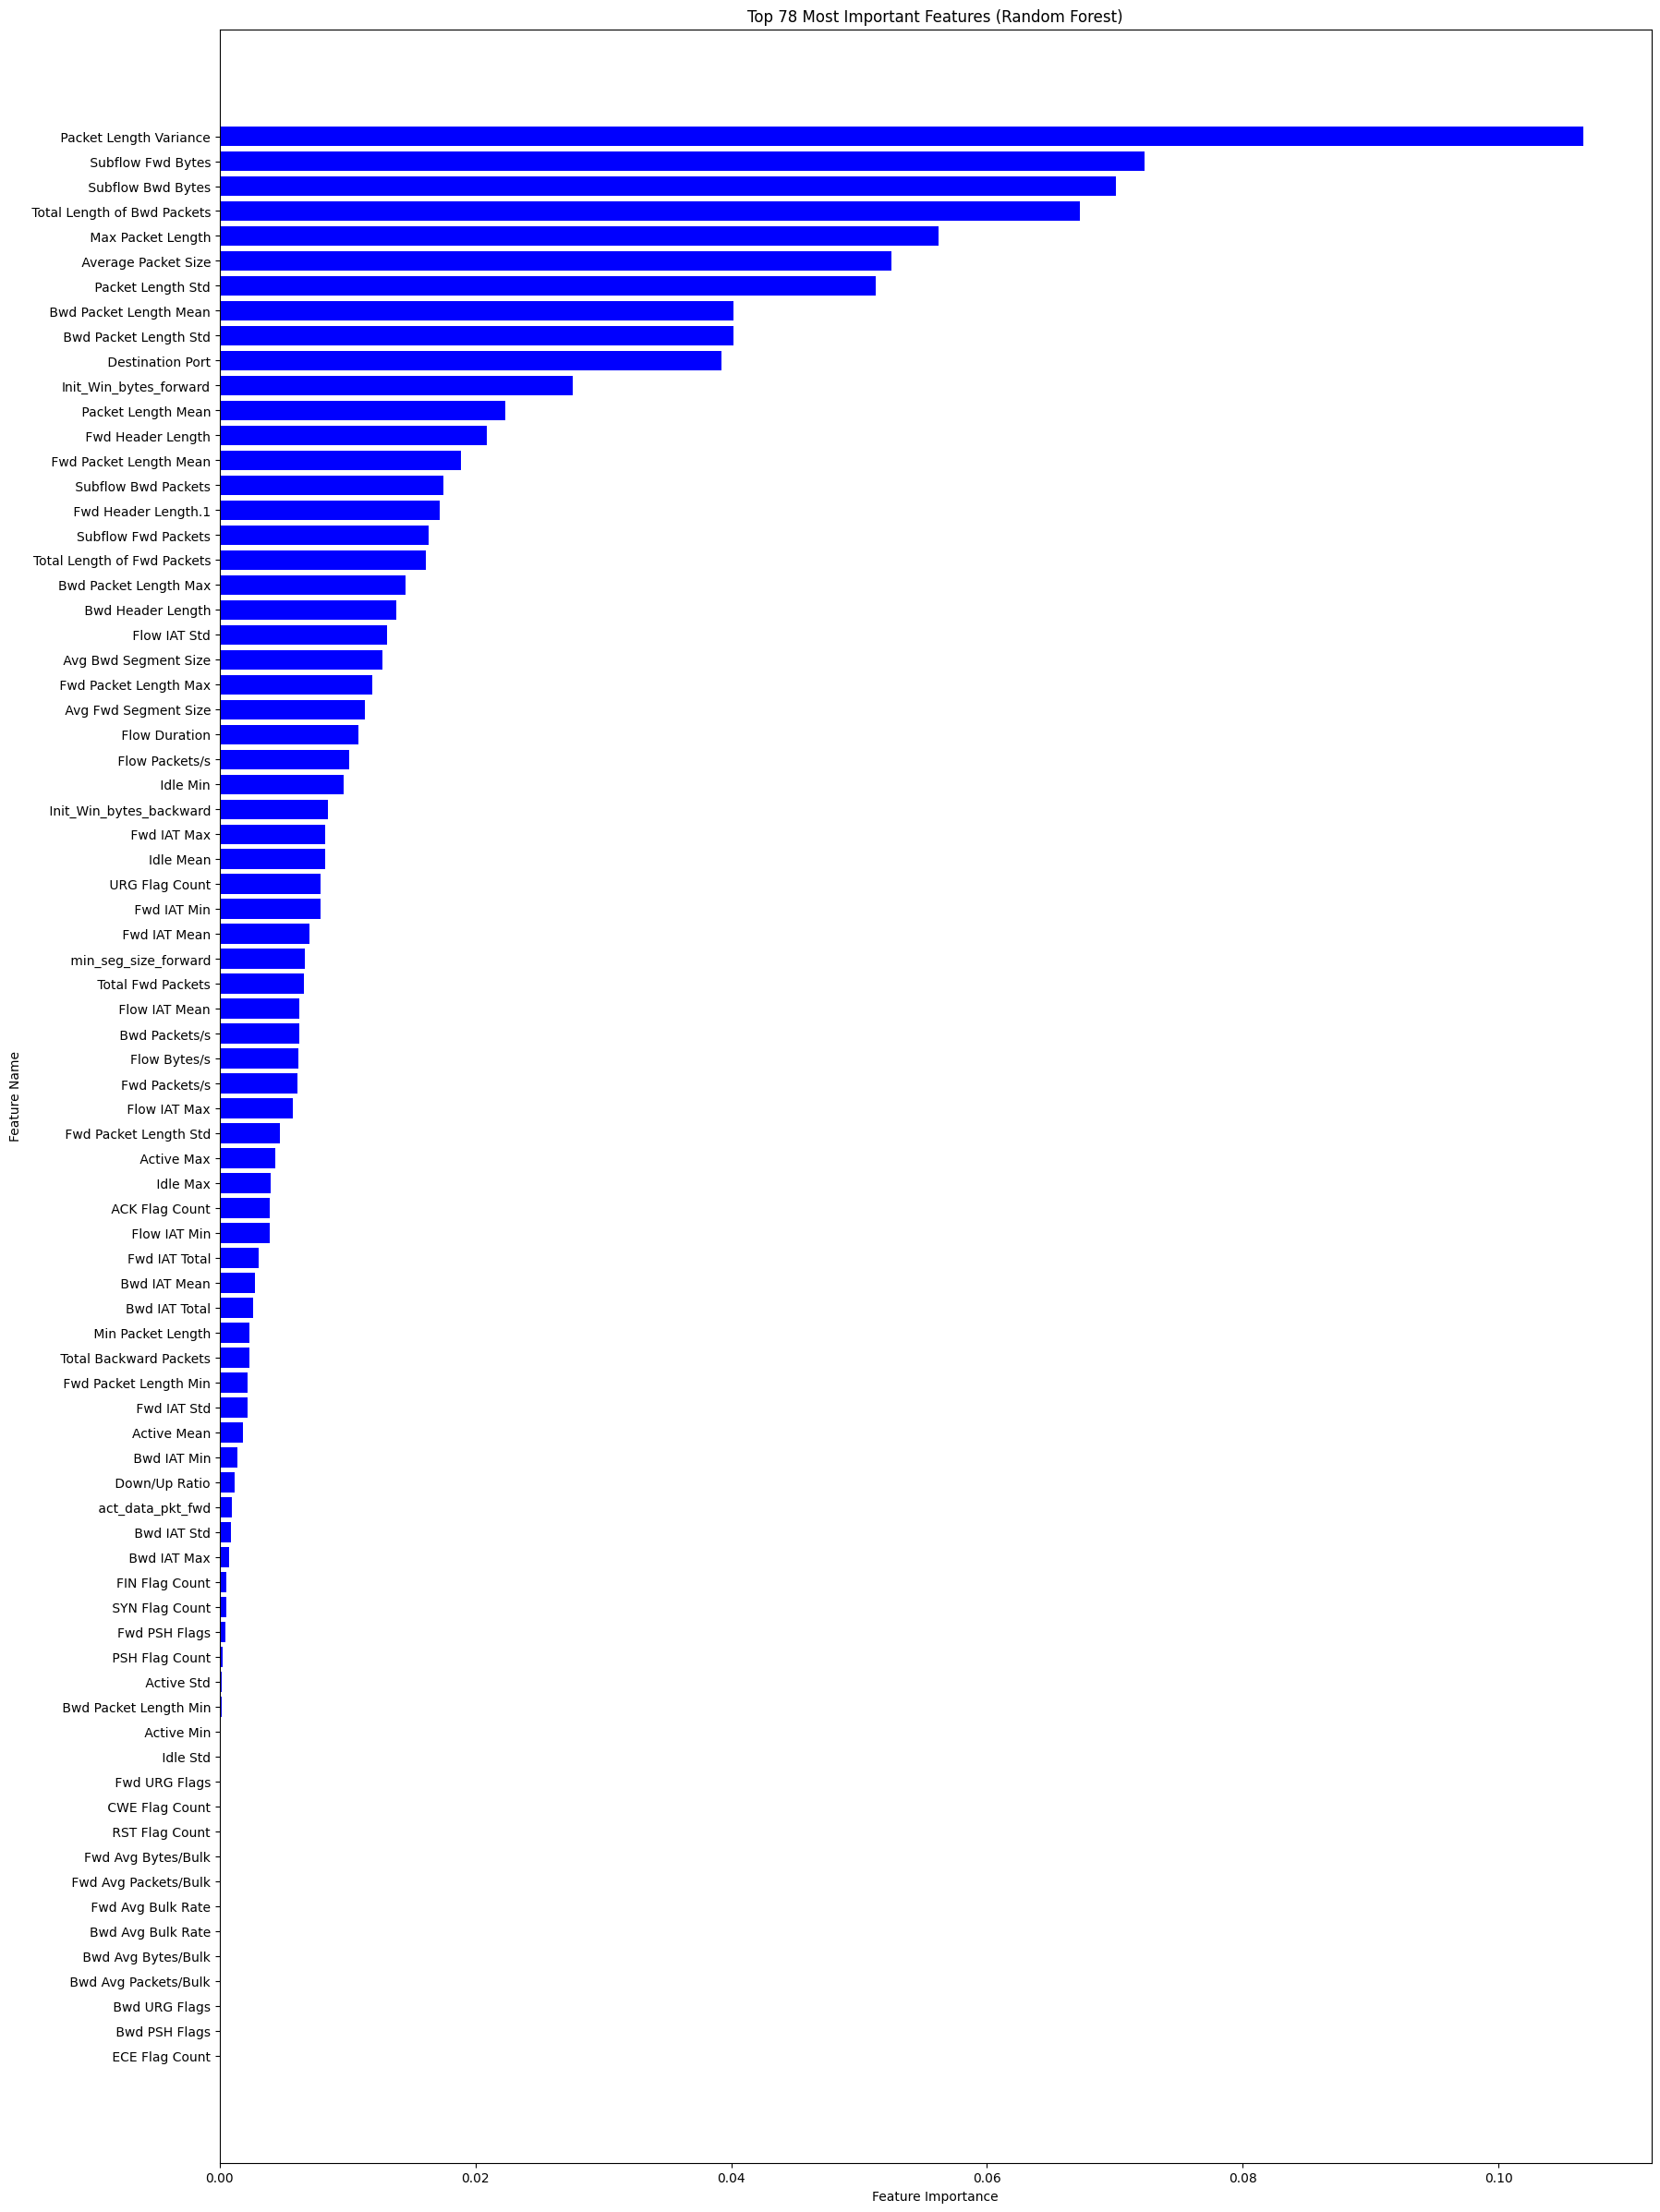

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 30))
plt.barh(least_important.head(78)['Feature'], least_important.head(78)['Importance'], color='blue')  
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 78 Most Important Features (Random Forest)")
plt.show()

In [ ]:
# Sort features by importance (ascending order)
least_important = feature_importance.sort_values(by='Importance', ascending=True)

# Get the names of the 8 least important features
least_important_features = least_important.head(7)['Feature'].values


# Drop these features from x
x = x.drop(columns=least_important_features)

print(f"Removed features: {least_important_features}")
print(f"New shape of x: {x.shape}")

Removed features: [' ECE Flag Count' ' Bwd PSH Flags' ' Bwd URG Flags'
 ' Bwd Avg Packets/Bulk' ' Bwd Avg Bytes/Bulk' 'Bwd Avg Bulk Rate'
 ' Fwd Avg Bulk Rate']
New shape of x: (2827876, 71)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05,random_state=42)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [13]:
  # This should print the installed version
import tensorflow as tf


In [14]:
print(tf.__version__)


2.13.0


In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam



input_dim = 71
encoding_dim = 32

# Input Layer
input_layer = Input(shape=(input_dim,), name="input")

# Encoder
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu', name="encoded")(encoded)

# Decoder (Reconstruction Head)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded_output = Dense(input_dim, activation='sigmoid', name="reconstruction")(decoded)

# Classifier (Classification Head)
classifier = Dense(256, activation='relu')(encoded)
classifier = BatchNormalization()(classifier)
classifier = Dropout(0.3)(classifier)
classifier = Dense(128, activation='relu')(classifier)
classifier = Dropout(0.3)(classifier)
classifier = Dense(64, activation='relu')(classifier)
classifier_output = Dense(15, activation='softmax', name="classification")(classifier)

# Define the Model
autoencoder = Model(inputs=input_layer, outputs=[decoded_output, classifier_output])

# Compile the model
autoencoder.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss={
        "reconstruction": "mse",
        "classification": "sparse_categorical_crossentropy"
    },
    loss_weights={
        "reconstruction": 1.0,
        "classification": 0.5
    },
    metrics={
        "reconstruction": ["mae"],
        "classification": ["accuracy"]
    }
)

# Train the model
history = autoencoder.fit(
    x_train,
    {"reconstruction": x_train, "classification": y_train},
    epochs=20,
    batch_size=64,
    shuffle=True,
    validation_data=(x_dev, {"reconstruction": x_dev, "classification": y_dev})
)

# Print classification accuracy per epoch
accuracy = history.history['classification_accuracy']
for epoch, acc in enumerate(accuracy):
    print(f"Epoch {epoch + 1}: Classification Accuracy = {acc * 100:.2f}%")


Epoch 1/20
41977/41977 [==============================] - 324s 8ms/step - loss: 132700916678656.0000 - reconstruction_loss: 132700916678656.0000 - classification_loss: 0.2040 - reconstruction_mae: 1488395.2500 - classification_accuracy: 0.9367 - val_loss: 119364044980224.0000 - val_reconstruction_loss: 119364044980224.0000 - val_classification_loss: 0.1546 - val_reconstruction_mae: 1496547.6250 - val_classification_accuracy: 0.9606
Epoch 2/20
41977/41977 [==============================] - 323s 8ms/step - loss: 132701713596416.0000 - reconstruction_loss: 132701713596416.0000 - classification_loss: 0.0964 - reconstruction_mae: 1488403.2500 - classification_accuracy: 0.9676 - val_loss: 119364044980224.0000 - val_reconstruction_loss: 119364044980224.0000 - val_classification_loss: 0.1239 - val_reconstruction_mae: 1496547.6250 - val_classification_accuracy: 0.9689
Epoch 3/20
41977/41977 [==============================] - 328s 8ms/step - loss: 132701554212864.0000 - reconstruction_loss: 1327

In [45]:
test_loss=autoencoder.evaluate(x_test,{"reconstruction":x_test,"classification":y_test},verbose=0)
print(f"\ntest set accuracy:{test_loss[4]*100:.2f}%")


test set accuracy:98.81%


In [87]:
import numpy as np

# Find indices where true label is 0
indices = y_test[y_test == 1].index
sample_index = indices[0]

print("Input features (x_test):")
print(sample_index)

# Reshape for prediction
sample_input = x_test.loc[sample_index].values.reshape(1, -1)
true_label = y_test.loc[sample_index]

# Get predictions
reconstructed_output, classification_probs = autoencoder.predict(sample_input)

# Predicted class
predicted_class = np.argmax(classification_probs)

# Results
print(f"True Class: {true_label}")
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {classification_probs}")


Input features (x_test):
623677
1/1 [==============================] - 0s 82ms/step
True Class: 1
Predicted Class: 1
Prediction Probabilities: [[1.9175556e-03 9.9808240e-01 1.5719777e-08 8.6549531e-19 2.4886140e-10
  1.7798295e-09 4.1206167e-09 1.4736944e-12 5.5745506e-22 4.5156236e-18
  4.1669768e-10 8.6124514e-15 9.5211384e-19 8.3105840e-23 2.4437027e-18]]


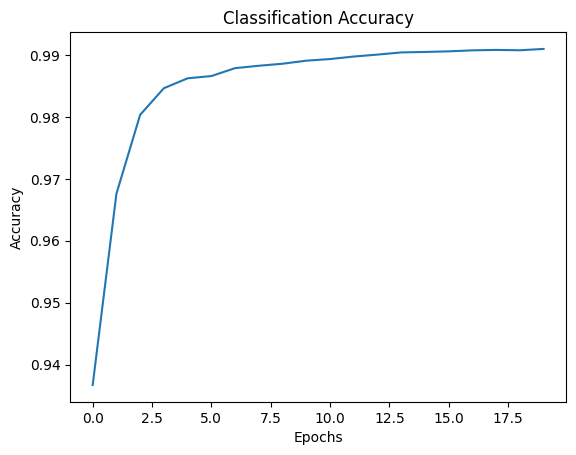

In [88]:
# Optionally, plot accuracy over epochs
plt.plot(history.history['classification_accuracy'])
plt.title('Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [50]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.regularizers import l2
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from tensorflow.keras.callbacks import EarlyStopping

# # Lightweight model builder
# def build_light_model(learning_rate=0.001, dropout_rate=0.2, input_shape=None):
#     model = Sequential()
#     model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001), input_shape=input_shape))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(15, activation='softmax'))
    
#     model.compile(
#         optimizer=Adam(learning_rate=learning_rate),
#         loss='sparse_categorical_crossentropy',
#         metrics=['accuracy']
#     )
#     return model

# # Wrap for Scikit-learn
# clf = KerasClassifier(
#     model=build_light_model,
#     model__input_shape=(x_train.shape[1],),
#     verbose=0
# )

# # Narrower hyperparameter space
# param_dist = {
#     "model__learning_rate": [0.001, 0.005],
#     "model__dropout_rate": [0.2, 0.3],
#     "batch_size": [64],
#     "epochs": [2, 3]
# }

# # Random search with fewer iterations
# random_search = RandomizedSearchCV(
#     estimator=clf,
#     param_distributions=param_dist,
#     n_iter=10,
#     verbose=1,
#     n_jobs=2,  # Can increase based on hardware
#     cv=3
# )

# # Fit with early stopping
# EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# random_search.fit(x_train, y_train, callbacks=[early_stop])

# # Best results
# print("Best parameters found: ", random_search.best_params_)
# print("Best score: ", random_search.best_score_)


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))  # if available
